In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

### Converted text file to csv files

In [11]:
train = pd.read_csv("Train.csv")  #imported files
test = pd.read_csv("Test.csv")

In [9]:
train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [8]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [774]:
test.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [775]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [776]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [777]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [778]:
telco= pd.concat([train,test],sort=False)
telco.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,...,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,...,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392,19.278463
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,...,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277,2.739772
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


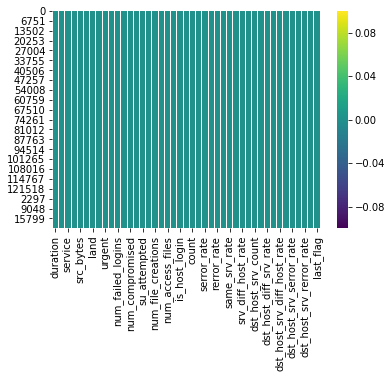

In [779]:
sns.heatmap(telco.isnull(), cmap='viridis') #checking for missing values

#### Data Cleaning

In [780]:
telco['protocol_type'].value_counts()

tcp     121567
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

In [781]:
telco['service'].value_counts()

http           48191
private        26626
domain_u        9937
smtp            8247
ftp_data        7710
other           5197
eco_i           4848
telnet          3979
ecr_i           3829
ftp             2446
finger          1903
pop_3           1283
auth            1022
imap4            953
Z39_50           907
uucp             830
courier          774
bgp              756
uucp_path        735
iso_tsap         735
whois            733
time             690
nnsp             672
vmnet            660
urp_i            625
domain           620
ctf              604
csnet_ns         579
supdup           571
http_443         566
               ...  
echo             471
mtp              471
login            458
klogin           454
netbios_dgm      430
ldap             429
netstat          386
netbios_ns       383
netbios_ssn      377
ssh              337
kshell           323
nntp             317
sql_net          263
IRC              200
ntp_u            178
rje               94
remote_job   

In [782]:
prot_type = pd.get_dummies(telco['protocol_type'],drop_first=False)

In [783]:
prot_type.drop(['icmp'],axis=1,inplace=True)

In [784]:
temp = (telco['service'].unique()).tolist()
temp.remove("private")
temp.remove("http")
telco['service']= telco['service'].replace([(temp)],'Rare_service')

In [785]:
telco['service'].value_counts()

Rare_service    73698
http            48191
private         26626
Name: service, dtype: int64

In [786]:
telco.service

0        Rare_service
1             private
2                http
3                http
4             private
5             private
6             private
7        Rare_service
8             private
9             private
10            private
11               http
12       Rare_service
13       Rare_service
14       Rare_service
15               http
16       Rare_service
17               http
18               http
19       Rare_service
20            private
21               http
22       Rare_service
23       Rare_service
24       Rare_service
25            private
26               http
27               http
28               http
29       Rare_service
             ...     
22513    Rare_service
22514            http
22515            http
22516    Rare_service
22517            http
22518    Rare_service
22519         private
22520         private
22521            http
22522            http
22523    Rare_service
22524            http
22525            http
22526            http
22527    R

In [787]:
servce = pd.get_dummies(telco['service'],drop_first=False)

In [788]:
servce.drop(['Rare_service'],axis=1,inplace=True)

In [789]:
telco = pd.concat([telco,servce],axis=1)

In [790]:
telco = pd.concat([telco,prot_type],axis=1)

In [791]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 47 columns):
duration                       148515 non-null int64
protocol_type                  148515 non-null object
service                        148515 non-null object
flag                           148515 non-null object
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
wrong_fragment                 148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 n

In [792]:
telco.drop(['service','protocol_type'],axis=1,inplace=True)

In [793]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 45 columns):
duration                       148515 non-null int64
flag                           148515 non-null object
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
wrong_fragment                 148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non

In [794]:
telco['flag'].value_counts()

SF        89819
S0        36864
REJ       15082
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64

In [795]:
temp = (telco['flag'].unique()).tolist()
temp.remove("SF")
temp.remove("S0")
temp.remove("REJ")
telco['flag']= telco['flag'].replace([(temp)],'Rare_flag')

In [796]:
telco['flag'].value_counts()

SF           89819
S0           36864
REJ          15082
Rare_flag     6750
Name: flag, dtype: int64

In [797]:
flg = pd.get_dummies(telco['flag'],drop_first=False)

In [798]:
flg.drop(['Rare_flag'],axis=1,inplace=True)

In [799]:
telco = pd.concat([telco,flg],axis=1)

In [800]:
telco.drop(['flag'],axis=1,inplace=True)

In [801]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 47 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
wrong_fragment                 148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
num_outbound_cmds              148515 non-

In [802]:
telco['duration'].value_counts()

0        134971
1          2576
2           946
4           890
3           677
5           444
282         241
6           228
280         218
27          201
28          188
281         147
7           142
10          139
8           113
9           107
12           99
23           92
30           87
11           87
283          85
15           84
31           83
20           80
21           76
29           73
22           72
25           65
26           65
14           58
          ...  
7372          1
11466         1
21701         1
7244          1
11338         1
13014         1
4946          1
13015         1
30558         1
16985         1
593           1
41541         1
465           1
337           1
41285         1
12375         1
8277          1
26588         1
8019          1
17240         1
14038         1
9940          1
11861         1
7763          1
3409          1
1360          1
7379          1
5330          1
3025          1
8890          1
Name: duration, Length: 

In [803]:
temp = (telco['duration'].unique()).tolist()
temp.remove(0)
telco['duration']= telco['duration'].replace([(temp)],1)

In [804]:
telco['duration'].value_counts()

0    134971
1     13544
Name: duration, dtype: int64

In [805]:
telco['src_bytes'].value_counts()

0          57017
8           3744
1           2905
44          2647
45          2317
1032        2312
46          1474
43          1415
105         1360
54540       1222
28          1130
147          956
30           912
42           910
520          714
146          705
18           652
334          583
215          511
12           487
207          464
224          455
221          444
209          429
216          429
222          425
218          418
214          415
217          406
232          400
           ...  
4674           1
2497           1
2110           1
12984          1
2751           1
2879           1
13240          1
3007           1
1919           1
529596         1
3391           1
11707          1
1598           1
5820           1
4031           1
10554          1
12614          1
57763          1
447            1
2750           1
2878           1
11322          1
2104380        1
3262           1
175338         1
11578          1
4030           1
2113          

In [806]:
temp = (telco['src_bytes'].unique()).tolist()
temp.remove(0)
telco['src_bytes']= telco['src_bytes'].replace([(temp)],1)

In [807]:
telco['dst_bytes'].value_counts()

0         77331
105        1550
44         1330
8314       1207
93          729
330         591
42          575
331         566
332         525
45          517
328         505
146         501
329         476
147         475
4           464
327         447
333         446
46          435
334         421
1           384
130         367
174         346
293         335
43          335
335         295
131         276
128         273
337         269
132         262
4152        259
          ...  
178017        1
44962         1
8116          1
22461         1
20414         1
8815          1
6203          1
17727         1
3382          1
5429          1
23484         1
19134         1
121612        1
13105         1
11058         1
4917          1
13233         1
9139          1
2998          1
13361         1
7476          1
7220          1
17471         1
40100         1
56492         1
9395          1
11118         1
19646         1
9523          1
17096         1
Name: dst_bytes, Length:

In [808]:
temp = (telco['dst_bytes'].unique()).tolist()
temp.remove(0)
telco['dst_bytes']= telco['dst_bytes'].replace([(temp)],1)

In [809]:
telco['land'].value_counts()

0    148483
1        32
Name: land, dtype: int64

In [810]:
telco['wrong_fragment'].value_counts()

0    147325
3       929
1       261
Name: wrong_fragment, dtype: int64

In [811]:
wrng_frmt = pd.get_dummies(telco['wrong_fragment'],drop_first=True)

In [812]:
telco = pd.concat([telco,wrng_frmt],axis=1)

In [813]:
telco.drop(['wrong_fragment'],axis=1,inplace=True)

In [814]:
telco['urgent'].value_counts()

0    148496
1        10
2         7
3         2
Name: urgent, dtype: int64

In [815]:
temp = (telco['urgent'].unique()).tolist()
temp.remove(0)
telco['urgent']= telco['urgent'].replace([(temp)],1)

In [816]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 48 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
num_outbound_cmds              148515 non-null int64
is_host_login                  148515 non-

In [817]:
telco = telco.rename(index=str, columns={1:"wrng_frgmt_1", 3:"wrng_frgmt_3" , "tcp":"prtcl_type_tcp", "udp":"prtcl_type_udp", "http":"service_http","private":"service_private","REJ":"flag_REJ","S0":"flag_S0","SF":"flag_SF"})

In [818]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 48 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
num_outbound_cmds              148515 non-null int64
is_host_login                  148515 non-null 

In [819]:
telco['hot'].value_counts()

0      144837
2        1883
1         459
28        277
30        258
4         193
6         146
5          87
24         68
3          66
19         58
22         57
18         48
14         30
7          14
20          9
15          5
11          4
10          3
9           2
25          2
44          2
8           1
12          1
77          1
17          1
21          1
33          1
101         1
Name: hot, dtype: int64

In [820]:
temp = (telco['hot'].unique()).tolist()
temp.remove(0)
telco['hot']= telco['hot'].replace([(temp)],1)

In [821]:
telco['num_failed_logins'].value_counts()

0    147915
1       577
2        10
3         8
4         4
5         1
Name: num_failed_logins, dtype: int64

In [822]:
temp = (telco['num_failed_logins'].unique()).tolist()
temp.remove(0)
telco['num_failed_logins']= telco['num_failed_logins'].replace([(temp)],1)

In [823]:
telco['logged_in'].value_counts()

0    88694
1    59821
Name: logged_in, dtype: int64

In [824]:
telco['num_compromised'].value_counts()

0       146860
1         1301
2          109
4           44
3           41
6           21
5           20
8            7
7            6
9            4
23           3
14           3
10           3
151          2
31           2
21           2
49           2
15           2
12           2
13           2
11           2
371          2
884          2
537          1
165          1
37           1
676          1
36           1
38           1
543          1
         ...  
373          1
247          1
375          1
121          1
761          1
378          1
78           1
716          1
1739         1
75           1
46           1
174          1
558          1
175          1
177          1
307          1
691          1
7479         1
54           1
568          1
57           1
187          1
193          1
452          1
198          1
456          1
457          1
74           1
202          1
44           1
Name: num_compromised, Length: 96, dtype: int64

In [825]:
temp = (telco['num_compromised'].unique()).tolist()
temp.remove(0)
telco['num_compromised']= telco['num_compromised'].replace([(temp)],1)

In [826]:
telco['root_shell'].value_counts()

0    148291
1       224
Name: root_shell, dtype: int64

In [827]:
telco['su_attempted'].value_counts()

0    148431
2        61
1        23
Name: su_attempted, dtype: int64

In [828]:
temp = (telco['su_attempted'].unique()).tolist()
temp.remove(0)
telco['su_attempted']= telco['su_attempted'].replace([(temp)],1)

In [829]:
telco['num_root'].value_counts()

0       147818
1          287
9          122
6           99
2           37
5           25
4           18
3           14
7            4
8            3
10           2
421          2
17           2
857          2
39           2
36           2
684          2
287          1
416          1
31           1
26           1
173          1
40           1
417          1
38           1
23           1
425          1
45           1
151          1
402          1
         ...  
502          1
119          1
247          1
121          1
505          1
889          1
123          1
605          1
91           1
218          1
450          1
54           1
55           1
184          1
187          1
572          1
190          1
446          1
191          1
71           1
338          1
841          1
74           1
204          1
77           1
206          1
975          1
1743         1
849          1
51           1
Name: num_root, Length: 91, dtype: int64

In [830]:
temp = (telco['num_root'].unique()).tolist()
temp.remove(0)
telco['num_root']= telco['num_root'].replace([(temp)],1)

In [831]:
telco['num_file_creations'].value_counts()

0      148186
1         168
2          50
4          19
3          10
5           7
15          5
7           5
8           5
10          5
17          5
12          4
6           4
11          4
18          4
26          3
40          3
14          3
25          3
20          3
13          2
23          2
9           2
16          1
33          1
22          1
38          1
36          1
34          1
28          1
21          1
29          1
43          1
27          1
19          1
100         1
Name: num_file_creations, dtype: int64

In [832]:
temp = (telco['num_file_creations'].unique()).tolist()
temp.remove(0)
telco['num_file_creations']= telco['num_file_creations'].replace([(temp)],1)

In [833]:
telco['num_shells'].value_counts()

0    148449
1        57
2         8
5         1
Name: num_shells, dtype: int64

In [834]:
temp = (telco['num_shells'].unique()).tolist()
temp.remove(0)
telco['num_shells']= telco['num_shells'].replace([(temp)],1)

In [835]:
telco['num_access_files'].value_counts()

0    148072
1       380
2        32
3         9
5         6
4         6
6         4
8         3
7         2
9         1
Name: num_access_files, dtype: int64

In [836]:
temp = (telco['num_access_files'].unique()).tolist()
temp.remove(0)
telco['num_access_files']= telco['num_access_files'].replace([(temp)],1)

In [837]:
telco['num_outbound_cmds'].value_counts()

0    148515
Name: num_outbound_cmds, dtype: int64

In [838]:
telco.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [839]:
telco['is_host_login'].value_counts()

0    148503
1        12
Name: is_host_login, dtype: int64

In [840]:
telco.drop(['is_host_login'],axis=1,inplace=True)

In [841]:
telco['is_guest_login'].value_counts()

0    146687
1      1828
Name: is_guest_login, dtype: int64

In [842]:
telco['count'].value_counts()

1      33582
2      11250
3       5257
4       4481
5       3596
6       2794
7       2659
8       2237
9       2043
10      1947
11      1847
511     1774
12      1654
13      1483
14      1314
15      1239
16      1165
17      1046
18       943
19       862
20       787
21       735
22       637
23       605
24       558
25       507
26       453
27       443
510      421
28       384
       ...  
372        7
342        7
386        7
470        7
337        7
410        7
385        7
406        7
345        7
362        7
467        7
454        7
339        7
474        7
420        7
349        7
411        7
415        7
355        7
504        7
377        6
417        6
471        6
501        6
402        6
433        6
422        6
500        5
423        5
413        5
Name: count, Length: 512, dtype: int64

In [843]:
temp = (telco['count'].unique()).tolist()
temp.remove(1)
j= [i for i in telco['count'] if i >= 11]
temp= [x for x in temp if x not in j]
telco['count']= telco['count'].replace([(temp)],2)

In [844]:
temp = (telco['count'].unique()).tolist()
temp.remove(1)
temp.remove(2)
telco['count']= telco['count'].replace([(temp)],3)

In [845]:
telco['count'].value_counts()

3    78655
2    36278
1    33582
Name: count, dtype: int64

In [846]:
count = pd.get_dummies(telco['count'],drop_first=False)

In [847]:
count.drop([3],axis=1,inplace=True)

In [848]:
telco = pd.concat([telco,count],axis=1)

In [849]:
telco.drop(['count'],axis=1,inplace=True)

In [850]:
telco['srv_count'].value_counts()

1      31343
2      14730
3       7736
4       6574
5       5510
6       4849
7       4585
8       4276
9       4154
10      3841
11      3833
12      3642
20      3558
14      3391
13      3390
19      3373
18      3313
16      3301
17      3270
15      3213
21      1266
511     1262
22      1196
24      1193
23      1146
25      1137
26       543
27       531
28       488
29       469
       ...  
330        3
414        3
337        3
341        3
342        3
339        3
470        3
473        3
362        3
361        3
488        3
402        3
349        3
406        3
345        3
420        2
471        2
433        2
501        2
423        2
422        2
411        2
465        2
410        2
415        2
500        2
413        2
490        2
417        2
504        1
Name: srv_count, Length: 512, dtype: int64

In [851]:
#wait
temp = (telco['srv_count'].unique()).tolist()
j= [i for i in telco['srv_count'] if i >= 11]
temp= [x for x in temp if x not in j]
telco['srv_count']= telco['srv_count'].replace([(temp)],"srv_count<10")

In [853]:
temp = (telco['srv_count'].unique()).tolist()
temp.remove('srv_count<10')
telco['srv_count']= telco['srv_count'].replace([(temp)],"srv_count_>10")

In [854]:
telco['srv_count'].value_counts()

srv_count<10     87612
srv_count_>10    60903
Name: srv_count, dtype: int64

In [855]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 47 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
srv_count                      148515 non-null 

In [856]:
srv_cnt = pd.get_dummies(telco['srv_count'],drop_first=False)

In [857]:
srv_cnt.drop(['srv_count_>10'],axis=1,inplace=True)

In [858]:
telco= pd.concat([telco,srv_cnt],axis=1)

In [859]:
telco.drop(['srv_count'],axis=1,inplace=True)

In [860]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 47 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
serror_rate                    148515 non-null 

In [861]:
telco = telco.rename(index=str, columns={1:"count_1",2:"count_2_to_10"})

In [862]:
telco['serror_rate'].value_counts()

0.00    106021
1.00     36543
0.50       516
0.07       371
0.06       371
0.33       341
0.08       318
0.01       304
0.05       278
0.03       254
0.99       250
0.25       231
0.09       229
0.04       221
0.10       192
0.02       178
0.20       165
0.17       150
0.14       149
0.11       127
0.12       101
0.97        79
0.15        78
0.16        71
0.98        64
0.13        61
0.18        53
0.96        41
0.21        41
0.23        39
         ...  
0.72         8
0.71         8
0.73         8
0.61         7
0.56         6
0.27         6
0.44         6
0.53         6
0.51         5
0.30         5
0.55         5
0.35         4
0.26         4
0.46         4
0.48         4
0.37         4
0.52         4
0.43         3
0.57         3
0.54         3
0.28         3
0.38         3
0.39         2
0.36         2
0.32         2
0.31         2
0.42         2
0.41         1
0.45         1
0.34         1
Name: serror_rate, Length: 99, dtype: int64

In [863]:
temp = (telco['serror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['serror_rate']= telco['serror_rate'].replace([(temp)],"serror_rate_0_to_1")

In [864]:
telco['serror_rate'].value_counts()

0.0                   106021
1.0                    36543
serror_rate_0_to_1      5951
Name: serror_rate, dtype: int64

In [865]:
serr_rate = pd.get_dummies(telco['serror_rate'],drop_first=False)

In [866]:
serr_rate.drop(['serror_rate_0_to_1'],axis=1,inplace=True)

In [867]:
telco= pd.concat([telco,serr_rate],axis=1)

In [868]:
telco = telco.rename(index=str, columns={0.0:"serror_rate_0",1.00:"serror_rate_1"})

In [869]:
telco.drop(['serror_rate'],axis=1,inplace=True)

In [870]:
telco['srv_serror_rate'].value_counts()

0.00    108383
1.00     37039
0.50       454
0.33       315
0.25       260
0.03       173
0.20       164
0.17       147
0.02       120
0.05       115
0.04       105
0.06        95
0.08        86
0.07        85
0.14        78
0.12        73
0.10        65
0.11        62
0.67        60
0.09        60
0.95        40
0.22        34
0.01        32
0.29        26
0.40        25
0.18        24
0.75        19
0.80        18
0.83        18
0.91        16
         ...  
0.63         4
0.32         4
0.64         3
0.78         3
0.44         3
0.42         3
0.73         3
0.46         3
0.84         3
0.24         3
0.82         3
0.65         3
0.34         2
0.61         2
0.55         2
0.74         2
0.28         2
0.72         2
0.81         2
0.79         2
0.45         2
0.48         2
0.70         1
0.54         1
0.47         1
0.96         1
0.31         1
0.68         1
0.51         1
0.77         1
Name: srv_serror_rate, Length: 94, dtype: int64

In [871]:
temp = (telco['srv_serror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['srv_serror_rate']= telco['srv_serror_rate'].replace([(temp)],"srv_serror_rate_0_to_1")

In [872]:
telco['srv_serror_rate'].value_counts()

0.0                       108383
1.0                        37039
srv_serror_rate_0_to_1      3093
Name: srv_serror_rate, dtype: int64

In [873]:
srv_serr_rate = pd.get_dummies(telco['srv_serror_rate'],drop_first=False)

In [874]:
srv_serr_rate.drop(['srv_serror_rate_0_to_1'],axis=1,inplace=True)

In [875]:
telco= pd.concat([telco,srv_serr_rate],axis=1)

In [876]:
telco = telco.rename(index=str, columns={0.0:"srv_serror_rate_0",1.00:"srv_serror_rate_1"})

In [877]:
telco.drop(['srv_serror_rate'],axis=1,inplace=True)

In [878]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 49 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
rerror_rate                    148515 non-null 

In [879]:
telco['rerror_rate'].value_counts()

0.00    126563
1.00     17057
0.90       296
0.92       286
0.93       281
0.50       276
0.91       235
0.95       219
0.89       213
0.94       185
0.88       171
0.96       162
0.97       146
0.33       144
0.25       130
0.75       118
0.86       118
0.98       111
0.67       110
0.87       106
0.03        99
0.85        91
0.02        77
0.20        76
0.99        74
0.82        72
0.83        71
0.80        70
0.84        65
0.01        61
         ...  
0.57         7
0.34         7
0.19         6
0.70         6
0.43         6
0.28         6
0.24         6
0.13         6
0.30         6
0.16         5
0.74         5
0.72         4
0.58         4
0.44         4
0.52         4
0.65         4
0.63         3
0.41         3
0.54         3
0.39         3
0.47         2
0.61         2
0.59         2
0.42         2
0.68         2
0.55         2
0.48         1
0.49         1
0.66         1
0.45         1
Name: rerror_rate, Length: 98, dtype: int64

In [880]:
temp = (telco['rerror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['rerror_rate']= telco['rerror_rate'].replace([(temp)],"rerror_rate_0_to_1")

In [881]:
telco['rerror_rate'].value_counts()

0.0                   126563
1.0                    17057
rerror_rate_0_to_1      4895
Name: rerror_rate, dtype: int64

In [882]:
rerr_rate = pd.get_dummies(telco['rerror_rate'],drop_first=False)

In [883]:
rerr_rate.drop(['rerror_rate_0_to_1'],axis=1,inplace=True)

In [884]:
telco= pd.concat([telco,rerr_rate],axis=1)

In [885]:
telco = telco.rename(index=str, columns={0.0:"rerror_rate_0",1.00:"rerror_rate_1"})

In [886]:
telco.drop(['rerror_rate'],axis=1,inplace=True)

In [887]:
telco['srv_rerror_rate'].value_counts()

0.00    126662
1.00     19524
0.50       346
0.33       210
0.25       138
0.20       111
0.67       104
0.17        85
0.97        76
0.04        51
0.98        50
0.03        49
0.14        49
0.40        46
0.12        44
0.02        43
0.05        42
0.75        42
0.08        42
0.06        35
0.83        34
0.10        32
0.07        31
0.11        29
0.80        29
0.94        27
0.60        27
0.09        25
0.88        23
0.96        22
         ...  
0.87         4
0.74         4
0.42         4
0.53         4
0.68         4
0.61         3
0.59         3
0.01         3
0.37         3
0.15         3
0.27         3
0.16         3
0.52         2
0.35         2
0.18         2
0.30         2
0.54         2
0.21         2
0.65         2
0.48         2
0.39         1
0.23         1
0.46         1
0.34         1
0.28         1
0.31         1
0.24         1
0.26         1
0.41         1
0.51         1
Name: srv_rerror_rate, Length: 95, dtype: int64

In [888]:
temp = (telco['srv_rerror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['srv_rerror_rate']= telco['srv_rerror_rate'].replace([(temp)],"srv_rerror_rate_0_to_1")

In [889]:
telco['srv_rerror_rate'].value_counts()

0.0                       126662
1.0                        19524
srv_rerror_rate_0_to_1      2329
Name: srv_rerror_rate, dtype: int64

In [890]:
srv_rerr_rate = pd.get_dummies(telco['srv_rerror_rate'],drop_first=False)

In [891]:
srv_rerr_rate.drop(['srv_rerror_rate_0_to_1'],axis=1,inplace=True) 

In [892]:
telco= pd.concat([telco,srv_rerr_rate],axis=1)

In [893]:
telco = telco.rename(index=str, columns={0.0:"srv_rerror_rate_0",1.00:"srv_rerror_rate_1"})

In [894]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 52 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
srv_rerror_rate                148515 non-null 

In [895]:
telco['same_srv_rate'].value_counts()

1.00    92671
0.01     4659
0.02     4126
0.03     3990
0.07     3889
0.06     3666
0.04     3662
0.05     3534
0.00     3510
0.08     3135
0.09     2163
0.50     2127
0.10     1606
0.12     1412
0.13     1341
0.14     1315
0.11     1289
0.99      839
0.15      816
0.33      814
0.17      697
0.25      691
0.16      620
0.20      604
0.18      421
0.24      320
0.19      301
0.22      286
0.67      271
0.23      267
        ...  
0.89       21
0.57       21
0.64       21
0.54       20
0.90       19
0.73       18
0.71       17
0.96       16
0.87       16
0.95       16
0.69       15
0.58       12
0.85       12
0.65       11
0.74       11
0.59       10
0.70       10
0.51       10
0.78        9
0.72        9
0.84        9
0.61        8
0.66        7
0.77        7
0.68        6
0.79        6
0.82        6
0.63        4
0.81        4
0.76        4
Name: same_srv_rate, Length: 101, dtype: int64

In [896]:
temp = (telco['same_srv_rate'].unique()).tolist()
temp.remove(1.00)
telco['same_srv_rate']= telco['same_srv_rate'].replace([(temp)],0)

In [897]:
telco['same_srv_rate'].value_counts()

1.0    92671
0.0    55844
Name: same_srv_rate, dtype: int64

In [898]:
same_serv_rte = pd.get_dummies(telco['same_srv_rate'],drop_first=False)

In [899]:
same_serv_rte.drop([0.0],axis=1,inplace=True)

In [900]:
telco=pd.concat([telco,same_serv_rte],axis=1)

In [901]:
telco.drop(['same_srv_rate'],axis=1,inplace=True)

In [902]:
telco = telco.rename(index=str, columns={1.0:"same_srv_rate_1"})

In [903]:
telco['diff_srv_rate'].value_counts()

0.00    92063
0.06    21197
0.07    10867
0.05     7134
1.00     4825
0.08     2232
0.01     1064
0.09      865
0.04      627
0.50      598
0.67      553
0.10      546
0.11      407
0.12      403
0.02      302
0.03      289
0.60      276
0.29      240
0.14      238
0.33      226
0.13      225
0.15      206
0.17      202
0.40      193
0.25      189
0.75      167
0.52      157
0.18      151
0.20      150
0.22      129
        ...  
0.62       12
0.78       11
0.73       10
0.47       10
0.77        9
0.70        9
0.76        8
0.63        8
0.61        8
0.59        8
0.65        8
0.87        7
0.48        6
0.94        6
0.81        6
0.91        6
0.86        6
0.68        5
0.90        5
0.85        5
0.89        5
0.79        4
0.84        4
0.34        4
0.74        4
0.93        4
0.92        4
0.72        3
0.49        2
0.66        2
Name: diff_srv_rate, Length: 101, dtype: int64

In [904]:
temp = (telco['diff_srv_rate'].unique()).tolist()
temp.remove(0.00)
telco['diff_srv_rate']= telco['diff_srv_rate'].replace([(temp)],1.0)

In [905]:
telco['diff_srv_rate'].value_counts()

0.0    92063
1.0    56452
Name: diff_srv_rate, dtype: int64

In [906]:
diff_serv_rte = pd.get_dummies(telco['diff_srv_rate'],drop_first=False)

In [907]:
diff_serv_rte.drop([1.0],axis=1,inplace=True)

In [908]:
telco=pd.concat([telco,diff_serv_rte],axis=1)

In [909]:
telco.drop(['diff_srv_rate'],axis=1,inplace=True)

In [910]:
telco = telco.rename(index=str, columns={0.0:"diff_srv_rate_0"})

In [911]:
telco['srv_diff_host_rate'].value_counts()

0.00    115141
1.00      9366
0.01      3110
0.67      1198
0.50      1190
0.12      1102
0.33       945
0.11       867
0.10       860
0.25       850
0.14       801
0.02       797
0.17       751
0.40       750
0.08       749
0.15       737
0.09       733
0.20       719
0.18       708
0.29       691
0.22       652
0.07       627
0.06       593
0.13       555
0.05       392
0.19       301
0.75       292
0.21       265
0.27       256
0.60       241
         ...  
0.92         8
0.95         7
0.94         6
0.78         6
0.64         5
0.86         5
0.54         4
0.47         4
0.90         4
0.96         4
0.58         3
0.87         3
0.93         3
0.37         3
0.79         3
0.73         2
0.46         2
0.69         2
0.76         2
0.70         2
0.53         2
0.74         2
0.84         1
0.82         1
0.39         1
0.66         1
0.41         1
0.63         1
0.61         1
0.65         1
Name: srv_diff_host_rate, Length: 87, dtype: int64

In [912]:
temp = (telco['srv_diff_host_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['srv_diff_host_rate']= telco['srv_diff_host_rate'].replace([(temp)],"srv_diff_host_rate_0_t0_1")

In [913]:
telco['srv_diff_host_rate'].value_counts()

0.0                          115141
srv_diff_host_rate_0_t0_1     24008
1.0                            9366
Name: srv_diff_host_rate, dtype: int64

In [914]:
srv_diff_host_rte = pd.get_dummies(telco['srv_diff_host_rate'],drop_first=False)

In [915]:
srv_diff_host_rte.drop(['srv_diff_host_rate_0_t0_1'],axis=1,inplace=True)

In [916]:
telco= pd.concat([telco,srv_diff_host_rte],axis=1)

In [917]:
telco = telco.rename(index=str, columns={0.0:"srv_diff_host_rate_0",1.00:"srv_diff_host_rate_1"})

In [918]:
telco.drop(['srv_diff_host_rate'],axis=1,inplace=True)

In [919]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 53 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
srv_rerror_rate                148515 non-null 

In [920]:
telco['dst_host_count'].value_counts()

255    88735
1       3485
2       2969
3       1480
4       1380
5        838
6        820
7        755
8        709
9        676
11       640
10       627
12       594
13       547
14       510
15       481
20       468
16       460
18       458
19       446
21       444
17       439
22       419
24       407
25       404
23       403
27       392
26       388
28       381
31       368
       ...  
231      107
238      106
237      106
205      106
221      105
216      105
241      105
220      104
209      104
206      104
245      103
248      103
253      103
250      103
219      101
251      101
244      101
247      101
224      100
226       99
236       99
227       95
242       95
243       94
252       92
233       92
249       91
246       90
254       83
0          4
Name: dst_host_count, Length: 256, dtype: int64

In [921]:
temp = (telco['dst_host_count'].unique()).tolist()
temp.remove(255)
telco['dst_host_count']= telco['dst_host_count'].replace([(temp)],"dst_host_count_!255")

In [922]:
telco['dst_host_count'].value_counts()

255                    88735
dst_host_count_!255    59780
Name: dst_host_count, dtype: int64

In [923]:
dst_host_count = pd.get_dummies(telco['dst_host_count'],drop_first=False)

In [924]:
dst_host_count.drop(['dst_host_count_!255'],axis=1,inplace=True)

In [925]:
telco= pd.concat([telco,dst_host_count],axis=1)

In [926]:
telco.drop(['dst_host_count'],axis=1,inplace=True)

In [927]:
telco = telco.rename(index=str, columns={255:"dst_host_count_255"})

In [928]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 53 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
srv_rerror_rate                148515 non-null 

In [929]:
telco['dst_host_srv_count'].value_counts()

255    43521
1      10044
2       5556
3       3109
254     2845
4       2836
5       2648
20      2593
6       2530
19      2466
7       2432
8       2380
18      2319
9       2251
10      2213
11      2187
17      2162
13      2111
16      2106
12      2098
14      2093
15      2026
253      870
25       786
24       751
22       720
23       709
21       702
251      559
245      411
       ...  
180      108
199      108
194      107
215      106
176      105
212      105
186      105
198      103
187      102
204      100
108       99
159       99
214       97
197       95
189       94
213       94
211       94
206       92
163       92
221       91
209       90
222       90
220       88
184       87
202       85
188       85
207       83
205       83
210       75
0          4
Name: dst_host_srv_count, Length: 256, dtype: int64

In [930]:
temp = (telco['dst_host_srv_count'].unique()).tolist()
temp.remove(255)
temp.remove(254)
telco['dst_host_srv_count']= telco['dst_host_srv_count'].replace([(temp)],"dst_host_srv_count_!254&255")

In [931]:
telco['dst_host_srv_count'].value_counts()

dst_host_srv_count_!254&255    102149
255                             43521
254                              2845
Name: dst_host_srv_count, dtype: int64

In [932]:
temp = (telco['dst_host_srv_count'].unique()).tolist()
temp.remove("dst_host_srv_count_!254&255")
telco['dst_host_srv_count']= telco['dst_host_srv_count'].replace([(temp)],"dst_host_srv_count_254&255")

In [933]:
telco['dst_host_srv_count'].value_counts()

dst_host_srv_count_!254&255    102149
dst_host_srv_count_254&255      46366
Name: dst_host_srv_count, dtype: int64

In [934]:
dst_host_srv_count = pd.get_dummies(telco['dst_host_srv_count'],drop_first=True)

In [935]:
telco = pd.concat([telco,dst_host_srv_count],axis=1)

In [936]:
telco.drop(['dst_host_srv_count'],axis=1,inplace=True)

In [937]:
telco.drop(['srv_rerror_rate'],axis=1,inplace=True)

In [938]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 52 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
dst_host_same_srv_rate         148515 non-null 

In [939]:
telco['dst_host_same_srv_rate'].value_counts()

1.00    58859
0.01     8492
0.00     8304
0.02     7462
0.07     6478
0.04     5947
0.05     5705
0.03     4571
0.06     3920
0.08     3126
0.09     1815
0.99     1224
0.98     1033
0.25      991
0.10      945
0.96      920
0.24      749
0.95      728
0.11      660
0.97      619
0.22      555
0.93      549
0.89      520
0.91      513
0.12      511
0.20      506
0.13      504
0.23      502
0.15      502
0.26      481
        ...  
0.45      259
0.44      257
0.60      255
0.64      254
0.32      249
0.57      246
0.81      245
0.74      244
0.30      244
0.53      244
0.55      243
0.42      242
0.51      236
0.61      236
0.77      233
0.70      230
0.39      229
0.58      226
0.68      224
0.41      221
0.54      220
0.52      214
0.46      214
0.43      211
0.63      210
0.59      210
0.48      208
0.72      202
0.37      196
0.66      188
Name: dst_host_same_srv_rate, Length: 101, dtype: int64

In [940]:
temp = (telco['dst_host_same_srv_rate'].unique()).tolist()
temp.remove(1.00)
telco['dst_host_same_srv_rate']= telco['dst_host_same_srv_rate'].replace([(temp)],"dst_host_same_srv_rate!1.00")

In [941]:
telco['dst_host_same_srv_rate'].value_counts()

dst_host_same_srv_rate!1.00    89656
1.0                            58859
Name: dst_host_same_srv_rate, dtype: int64

In [942]:
dst_host_same_srv_rate = pd.get_dummies(telco['dst_host_same_srv_rate'],drop_first=True)

In [943]:
telco= pd.concat([telco,dst_host_same_srv_rate],axis=1)

In [944]:
telco.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)

In [945]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 52 columns):
duration                       148515 non-null int64
src_bytes                      148515 non-null int64
dst_bytes                      148515 non-null int64
land                           148515 non-null int64
urgent                         148515 non-null int64
hot                            148515 non-null int64
num_failed_logins              148515 non-null int64
logged_in                      148515 non-null int64
num_compromised                148515 non-null int64
root_shell                     148515 non-null int64
su_attempted                   148515 non-null int64
num_root                       148515 non-null int64
num_file_creations             148515 non-null int64
num_shells                     148515 non-null int64
num_access_files               148515 non-null int64
is_guest_login                 148515 non-null int64
dst_host_diff_srv_rate         148515 non-null 

In [946]:
telco['dst_host_diff_srv_rate'].value_counts()

0.00    56183
0.07    18079
0.06    11625
0.01    11380
0.02     8576
0.05     8086
0.08     7476
0.03     4670
0.04     3575
0.09     2926
1.00     2695
0.10      738
0.11      547
0.12      456
0.13      355
0.15      353
0.14      343
0.73      321
0.50      308
0.17      276
0.74      262
0.16      262
0.18      259
0.20      238
0.51      236
0.67      221
0.25      219
0.22      217
0.64      217
0.52      212
        ...  
0.31       88
0.59       87
0.80       87
0.78       86
0.94       84
0.36       84
0.96       82
0.48       82
0.42       80
0.89       77
0.26       77
0.87       72
0.77       72
0.92       72
0.99       70
0.30       70
0.35       69
0.83       69
0.46       68
0.98       68
0.79       66
0.32       65
0.90       62
0.28       62
0.39       60
0.81       57
0.37       53
0.41       51
0.88       50
0.34       44
Name: dst_host_diff_srv_rate, Length: 101, dtype: int64

In [947]:
temp = (telco['dst_host_diff_srv_rate'].unique()).tolist()
temp.remove(0.00)
telco['dst_host_diff_srv_rate']= telco['dst_host_diff_srv_rate'].replace([(temp)],"dst_host_diff_srv_rate!0.00")

In [948]:
dst_host_diff_srv_rate = pd.get_dummies(telco['dst_host_diff_srv_rate'],drop_first=True)

In [949]:
telco= pd.concat([telco,dst_host_diff_srv_rate],axis=1)

In [950]:
telco.drop(['dst_host_diff_srv_rate'],axis=1,inplace=True)

In [951]:
telco['dst_host_same_src_port_rate'].value_counts()

0.00    75678
0.01    20891
1.00    12015
0.02     6711
0.03     3799
0.04     2420
0.05     1912
0.06     1484
0.08     1239
0.50     1220
0.07     1200
0.33     1144
0.25     1016
0.20      918
0.17      856
0.11      855
0.14      834
0.12      827
0.09      805
0.10      735
0.96      260
0.95      253
0.15      246
0.99      246
0.29      236
0.22      228
0.98      221
0.13      218
0.35      213
0.16      212
        ...  
0.75      115
0.90      114
0.53      112
0.55      111
0.62      105
0.56      105
0.58      104
0.78      104
0.71      102
0.60      101
0.76       99
0.54       96
0.48       95
0.52       94
0.57       93
0.69       92
0.64       89
0.65       88
0.61       87
0.73       83
0.79       82
0.81       81
0.70       79
0.59       77
0.74       74
0.63       72
0.68       71
0.77       68
0.72       62
0.66       59
Name: dst_host_same_src_port_rate, Length: 101, dtype: int64

In [952]:
temp = (telco['dst_host_same_src_port_rate'].unique()).tolist()
temp.remove(0.00)
telco['dst_host_same_src_port_rate']= telco['dst_host_same_src_port_rate'].replace([(temp)],"dst_host_same_src_port_rate!0.00")

In [953]:
dst_host_same_src_port_rate = pd.get_dummies(telco['dst_host_same_src_port_rate'],drop_first=True)

In [954]:
telco= pd.concat([telco,dst_host_same_src_port_rate],axis=1)

In [955]:
telco.drop(['dst_host_same_src_port_rate'],axis=1,inplace=True)

In [956]:
temp = (telco['dst_host_srv_diff_host_rate'].unique()).tolist()
temp.remove(0.00)
telco['dst_host_srv_diff_host_rate']= telco['dst_host_srv_diff_host_rate'].replace([(temp)],"dst_host_srv_diff_host_rate!0.00")

In [957]:
dst_host_srv_diff_host_rate = pd.get_dummies(telco['dst_host_srv_diff_host_rate'],drop_first=True)

In [958]:
telco= pd.concat([telco,dst_host_srv_diff_host_rate],axis=1)

In [959]:
telco.drop(['dst_host_srv_diff_host_rate'],axis=1,inplace=True)

In [960]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 52 columns):
duration                            148515 non-null int64
src_bytes                           148515 non-null int64
dst_bytes                           148515 non-null int64
land                                148515 non-null int64
urgent                              148515 non-null int64
hot                                 148515 non-null int64
num_failed_logins                   148515 non-null int64
logged_in                           148515 non-null int64
num_compromised                     148515 non-null int64
root_shell                          148515 non-null int64
su_attempted                        148515 non-null int64
num_root                            148515 non-null int64
num_file_creations                  148515 non-null int64
num_shells                          148515 non-null int64
num_access_files                    148515 non-null int64
is_guest_login           

In [961]:
telco['dst_host_serror_rate'].value_counts()

0.00    99310
1.00    35092
0.01     4005
0.02     1472
0.03      824
0.04      502
0.09      461
0.08      442
0.05      440
0.99      332
0.07      287
0.33      260
0.10      255
0.16      231
0.06      229
0.11      205
0.13      199
0.98      189
0.50      184
0.25      145
0.12      140
0.14      133
0.97      132
0.15      121
0.96      117
0.27       97
0.94       88
0.20       86
0.17       85
0.18       80
        ...  
0.36       28
0.38       28
0.86       27
0.26       27
0.76       27
0.69       26
0.79       26
0.84       26
0.46       26
0.70       26
0.57       26
0.63       24
0.52       23
0.77       23
0.48       23
0.68       23
0.65       23
0.39       23
0.30       23
0.37       22
0.28       22
0.32       21
0.61       21
0.41       20
0.43       20
0.74       19
0.66       19
0.59       18
0.34       18
0.72       17
Name: dst_host_serror_rate, Length: 101, dtype: int64

In [962]:
temp = (telco['dst_host_serror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['dst_host_serror_rate']= telco['dst_host_serror_rate'].replace([(temp)],"dst_host_serror_rate_0_to_1")

In [963]:
telco['dst_host_serror_rate'].value_counts()

0.0                            99310
1.0                            35092
dst_host_serror_rate_0_to_1    14113
Name: dst_host_serror_rate, dtype: int64

In [964]:
dst_host_serror_rate = pd.get_dummies(telco['dst_host_serror_rate'],drop_first=False)

In [965]:
dst_host_serror_rate.drop(['dst_host_serror_rate_0_to_1'],axis=1,inplace=True)

In [966]:
telco= pd.concat([telco,dst_host_serror_rate],axis=1)

In [967]:
telco = telco.rename(index=str, columns={0.0:"dst_host_serror_rate_0",1.00:"dst_host_serror_rate_1"})

In [968]:
telco.drop(['dst_host_serror_rate'],axis=1,inplace=True)

In [969]:
temp = (telco['dst_host_rerror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['dst_host_rerror_rate']= telco['dst_host_rerror_rate'].replace([(temp)],"dst_host_rerror_rate_0_to_1")

In [970]:
telco['dst_host_rerror_rate'].value_counts()

0.0                            116547
dst_host_rerror_rate_0_to_1     18756
1.0                             13212
Name: dst_host_rerror_rate, dtype: int64

In [971]:
dst_host_rerror_rate = pd.get_dummies(telco['dst_host_rerror_rate'],drop_first=False)

In [972]:
dst_host_rerror_rate.drop(['dst_host_rerror_rate_0_to_1'],axis=1,inplace=True)

In [973]:
telco= pd.concat([telco,dst_host_rerror_rate],axis=1)

In [974]:
telco = telco.rename(index=str, columns={0.0:"dst_host_rerror_rate_0",1.00:"dst_host_rerror_rate_1"})

In [975]:
telco.drop(['dst_host_rerror_rate'],axis=1,inplace=True)

In [976]:
temp = (telco['dst_host_srv_serror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['dst_host_srv_serror_rate']= telco['dst_host_srv_serror_rate'].replace([(temp)],"dst_host_srv_serror_rate_0_to_1")

In [977]:
telco['dst_host_srv_serror_rate'].value_counts()

0.0                                104274
1.0                                 35950
dst_host_srv_serror_rate_0_to_1      8291
Name: dst_host_srv_serror_rate, dtype: int64

In [978]:
dst_host_srv_serror_rate = pd.get_dummies(telco['dst_host_srv_serror_rate'],drop_first=False)

In [979]:
dst_host_srv_serror_rate.drop(['dst_host_srv_serror_rate_0_to_1'],axis=1,inplace=True)

In [980]:
telco= pd.concat([telco,dst_host_srv_serror_rate],axis=1)

In [981]:
telco = telco.rename(index=str, columns={0.0:"dst_host_srv_serror_rate_0",1.00:"dst_host_srv_serror_rate_1"})

In [982]:
telco.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)

In [983]:
temp = (telco['dst_host_srv_rerror_rate'].unique()).tolist()
temp.remove(0.00)
temp.remove(1.00)
telco['dst_host_srv_rerror_rate']= telco['dst_host_srv_rerror_rate'].replace([(temp)],"dst_host_srv_rerror_rate_0_to_1")

In [984]:
telco['dst_host_srv_rerror_rate'].value_counts()

0.0                                121908
1.0                                 17433
dst_host_srv_rerror_rate_0_to_1      9174
Name: dst_host_srv_rerror_rate, dtype: int64

In [985]:
dst_host_srv_rerror_rate = pd.get_dummies(telco['dst_host_srv_rerror_rate'],drop_first=False)

In [986]:
dst_host_srv_rerror_rate.drop(['dst_host_srv_rerror_rate_0_to_1'],axis=1,inplace=True)

In [987]:
telco= pd.concat([telco,dst_host_srv_rerror_rate],axis=1)

In [988]:
telco = telco.rename(index=str, columns={0.0:"dst_host_srv_rerror_rate_0",1.00:"dst_host_srv_rerror_rate_1"})

In [989]:
telco.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)

In [990]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 56 columns):
duration                            148515 non-null int64
src_bytes                           148515 non-null int64
dst_bytes                           148515 non-null int64
land                                148515 non-null int64
urgent                              148515 non-null int64
hot                                 148515 non-null int64
num_failed_logins                   148515 non-null int64
logged_in                           148515 non-null int64
num_compromised                     148515 non-null int64
root_shell                          148515 non-null int64
su_attempted                        148515 non-null int64
num_root                            148515 non-null int64
num_file_creations                  148515 non-null int64
num_shells                          148515 non-null int64
num_access_files                    148515 non-null int64
is_guest_login           

In [991]:
telco.drop(['last_flag'],axis=1,inplace=True)

In [992]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 55 columns):
duration                            148515 non-null int64
src_bytes                           148515 non-null int64
dst_bytes                           148515 non-null int64
land                                148515 non-null int64
urgent                              148515 non-null int64
hot                                 148515 non-null int64
num_failed_logins                   148515 non-null int64
logged_in                           148515 non-null int64
num_compromised                     148515 non-null int64
root_shell                          148515 non-null int64
su_attempted                        148515 non-null int64
num_root                            148515 non-null int64
num_file_creations                  148515 non-null int64
num_shells                          148515 non-null int64
num_access_files                    148515 non-null int64
is_guest_login           

In [993]:
telco['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
udpstorm               2
spy                    2
worm                   2
sqlattack              2


In [994]:
temp = (telco['attack'].unique()).tolist()
temp.remove("normal")
telco['attack']= telco['attack'].replace([(temp)],"attacked")

In [995]:
telco['attack'].value_counts()

normal      77053
attacked    71462
Name: attack, dtype: int64

In [996]:
attack = pd.get_dummies(telco['attack'],drop_first=False)

In [997]:
attack.drop(['normal'],axis=1,inplace=True)

In [998]:
telco.drop(['attack'],axis=1,inplace=True)

In [999]:
telco= pd.concat([telco,attack],axis=1)

In [1000]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Data columns (total 55 columns):
duration                            148515 non-null int64
src_bytes                           148515 non-null int64
dst_bytes                           148515 non-null int64
land                                148515 non-null int64
urgent                              148515 non-null int64
hot                                 148515 non-null int64
num_failed_logins                   148515 non-null int64
logged_in                           148515 non-null int64
num_compromised                     148515 non-null int64
root_shell                          148515 non-null int64
su_attempted                        148515 non-null int64
num_root                            148515 non-null int64
num_file_creations                  148515 non-null int64
num_shells                          148515 non-null int64
num_access_files                    148515 non-null int64
is_guest_login           

In [1002]:
t_train= telco.iloc[0:125971]
t_train.describe()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_diff_host_rate!0.00,dst_host_serror_rate_0,dst_host_serror_rate_1,dst_host_rerror_rate_0,dst_host_rerror_rate_1,dst_host_srv_serror_rate_0,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_0,dst_host_srv_rerror_rate_1,attacked
count,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,...,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000,125971.000000
mean,0.079526,0.607910,0.460471,0.000198,0.000071,0.021203,0.000968,0.395734,0.010209,0.001342,...,0.310143,0.646053,0.266426,0.819054,0.081749,0.677600,0.271936,0.846338,0.105032,0.465425
std,0.270559,0.488219,0.498437,0.014086,0.008452,0.144062,0.031105,0.489010,0.100521,0.036603,...,0.462554,0.478195,0.442092,0.384975,0.273983,0.467397,0.444959,0.360626,0.306596,0.498805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1004]:
s_test= telco.iloc[125972:148515]
s_test.describe()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_diff_host_rate!0.00,dst_host_serror_rate_0,dst_host_serror_rate_1,dst_host_rerror_rate_0,dst_host_rerror_rate_1,dst_host_srv_serror_rate_0,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_0,dst_host_srv_rerror_rate_1,attacked
count,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.156412,0.661758,0.584572,0.000311,0.000444,0.044670,0.021204,0.442222,0.016369,0.002440,...,0.275651,0.795147,0.067870,0.593044,0.129264,0.839063,0.075145,0.678392,0.186399,0.569223
std,0.363254,0.473122,0.492807,0.017619,0.021058,0.206583,0.144067,0.496661,0.126892,0.049335,...,0.446852,0.403603,0.251529,0.491277,0.335499,0.367481,0.263631,0.467104,0.389437,0.495196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1005]:
X= t_train.iloc[:, :-1]
X.head()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_same_src_port_rate!0.00,dst_host_srv_diff_host_rate!0.00,dst_host_serror_rate_0,dst_host_serror_rate_1,dst_host_rerror_rate_0,dst_host_rerror_rate_1,dst_host_srv_serror_rate_0,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_0,dst_host_srv_rerror_rate_1
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,0,1,1,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [1006]:
Y= t_train[t_train.columns[-1]]
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: attacked, dtype: uint8

### Logistic Regression

In [1010]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state = 200)

In [1011]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [1012]:
logreg = LogisticRegression()
logreg.fit( X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1013]:
logreg.score(X_test,Y_test)

0.9813851954752927

### Bagging Classifier

In [1014]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [1015]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [1016]:
clf.fit(X_train,Y_train)

C:\Users\Sreenivas\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Sreenivas\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [1017]:
clf.oob_score_

0.9925676748432166

In [1018]:
clf.score(X_test,Y_test)

0.9936892240523914

### Feature Engineering

In [1019]:
print (clf.estimators_[0].feature_importances_)

[1.30924152e-02 2.58752402e-02 6.68911265e-01 0.00000000e+00
 0.00000000e+00 2.22011687e-02 0.00000000e+00 1.03119831e-03
 1.16774745e-03 2.16719283e-05 6.39521094e-05 5.99240659e-04
 1.38037573e-04 9.38327587e-05 1.25163734e-04 8.72384708e-04
 1.84221265e-03 5.72582501e-02 4.69537108e-02 6.23087642e-03
 1.23399819e-03 3.44653343e-04 2.53163649e-04 1.18618717e-03
 1.61746336e-04 9.40854219e-04 2.53312196e-03 1.10323281e-02
 2.43314395e-04 8.57406116e-03 3.73554007e-06 5.00301919e-05
 6.68314647e-04 2.53356172e-04 2.00378071e-04 1.95591720e-04
 1.12833482e-04 7.95529059e-02 9.50033581e-04 3.23997089e-04
 1.91335642e-03 9.11238608e-04 2.17931324e-03 8.43803692e-03
 4.78168003e-04 5.49586375e-03 1.18277969e-03 1.24482913e-05
 1.24466079e-02 1.82768662e-04 5.45954804e-04 7.16132349e-04
 1.58268548e-03 8.62167272e-03]


In [1020]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [1021]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [1022]:
feature_importance.sort_values(ascending=False)

dst_bytes                           0.667201
diff_srv_rate_0                     0.051841
service_private                     0.047945
prtcl_type_tcp                      0.040351
hot                                 0.022055
src_bytes                           0.019220
dst_host_count_255                  0.017637
dst_host_rerror_rate_0              0.013694
dst_host_same_src_port_rate!0.00    0.012261
srv_count<10                        0.011446
logged_in                           0.010029
service_http                        0.008923
serror_rate_1                       0.007919
flag_SF                             0.007528
duration                            0.007371
dst_host_diff_srv_rate!0.00         0.006254
dst_host_srv_rerror_rate_1          0.006249
dst_host_same_srv_rate!1.00         0.005788
dst_host_srv_diff_host_rate!0.00    0.004785
prtcl_type_udp                      0.004749
count_2_to_10                       0.004389
dst_host_srv_rerror_rate_0          0.002430
dst_host_s